In [73]:
# data from https://discord.com/channels/@me/1207108913313480794/1207109178011688991

import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
import warnings 

In [74]:
data = pd.read_csv('Fertilizer Prediction.csv')
data

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [75]:
data.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [76]:

data.describe(include='all')

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
count,99.000000,99.000000,99.000000,99,99,99.000000,99.000000,99.000000,99
unique,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,Loamy,Sugarcane,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,21,13,NaN,NaN,NaN,22
mean,30.282828,59.151515,43.181818,NaN,NaN,18.909091,3.383838,18.606061,NaN
std,3.502304,5.840331,11.271568,NaN,NaN,11.599693,5.814667,13.476978,NaN
min,25.000000,50.000000,25.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN
25%,28.000000,54.000000,34.000000,NaN,NaN,10.000000,0.000000,9.000000,NaN
50%,30.000000,60.000000,41.000000,NaN,NaN,13.000000,0.000000,19.000000,NaN
75%,33.000000,64.000000,50.500000,NaN,NaN,24.000000,7.500000,30.000000,NaN


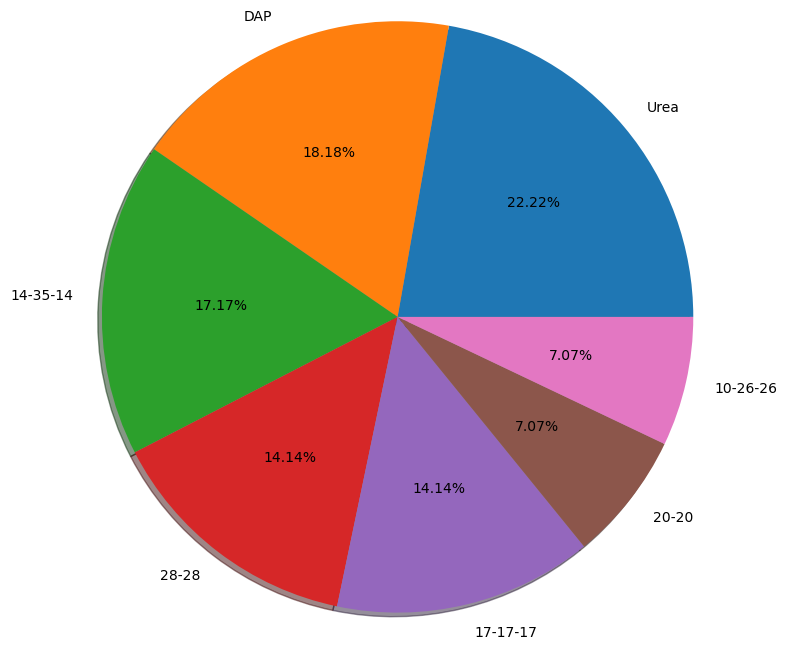

In [77]:
labels= 'Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20','10-26-26'
fig,ax=plt.subplots()
ax.pie(data['Fertilizer Name'].value_counts(),labels=labels,radius=2,autopct='%1.2f%%', shadow=True)
plt.show()

In [79]:
data['Fertilizer Name'].value_counts()

copy_data = data.copy()

In [80]:
y= data['Fertilizer Name']
x = data.drop('Fertilizer Name',axis=1)
data.drop(columns=['Soil Type','Crop Type'],inplace=True)

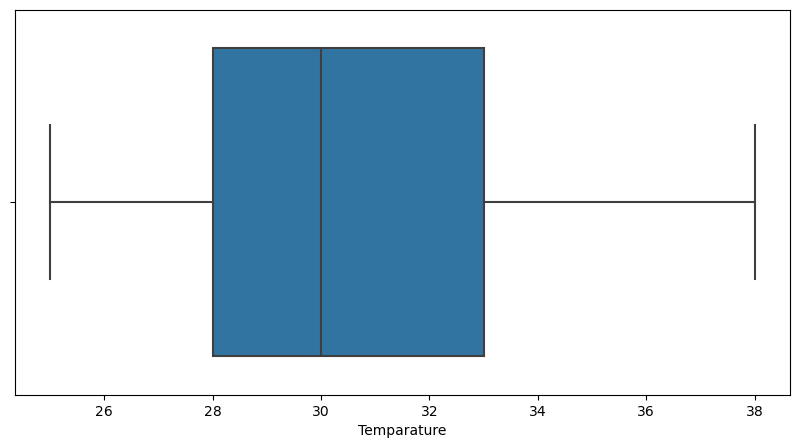

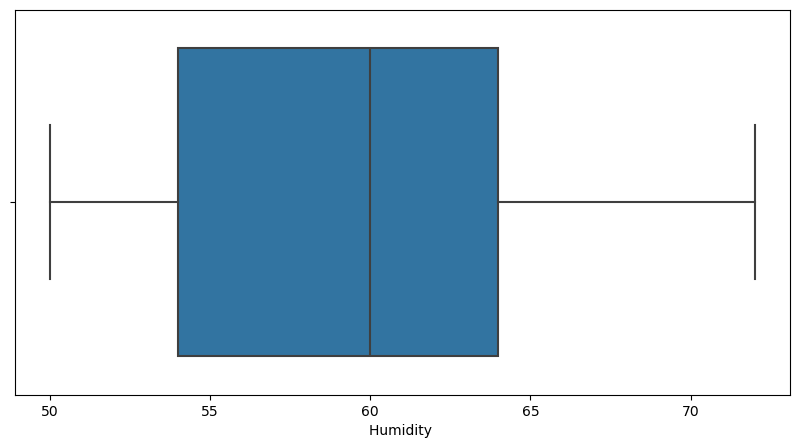

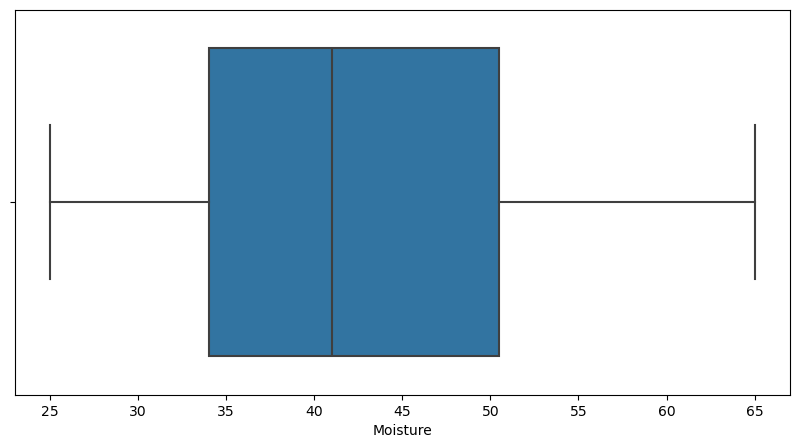

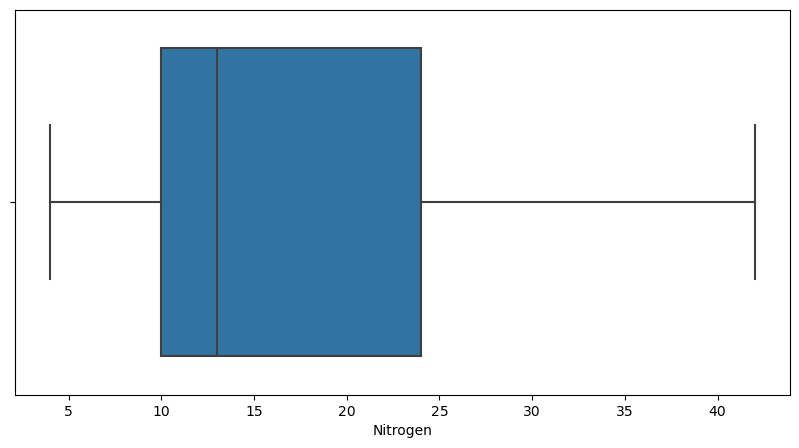

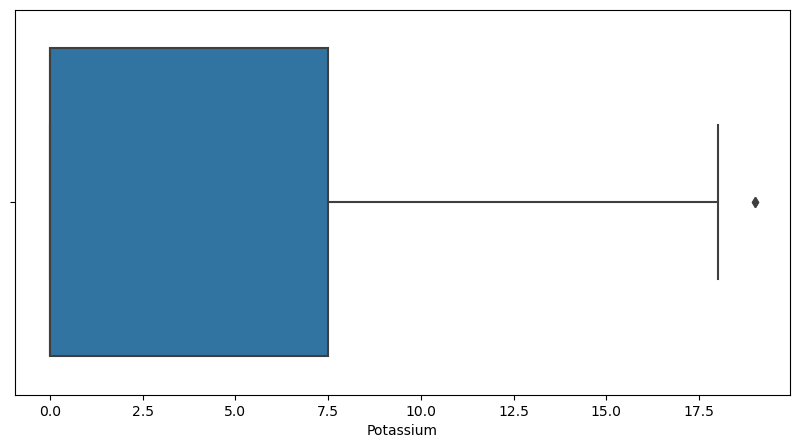

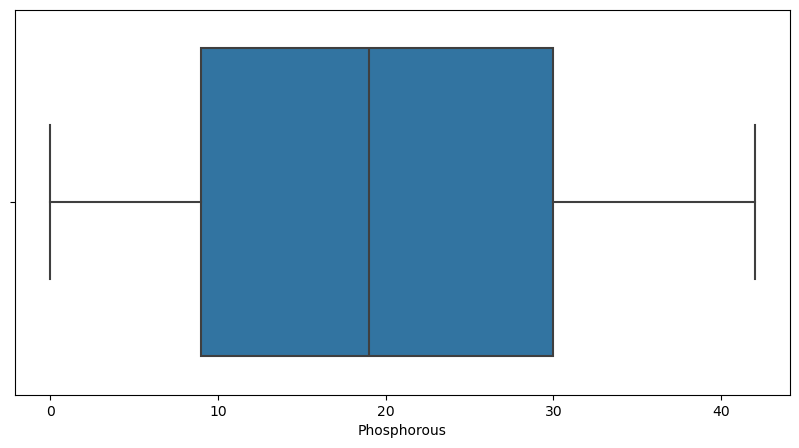

In [81]:
for column in data.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=data)

In [82]:
for column in data.columns[0:-1]:
    q1=data[column].quantile(0.25)
    q2=data[column].quantile(0.75)
    IQR=q2-q1
    lower_limit=q1-(1.5*IQR)
    upper_limit=q2+(1.5*IQR)
    data[column]=np.where(data[column]<=lower_limit,lower_limit,data[column])
    data[column]=np.where(data[column]>=upper_limit,upper_limit,data[column])

data

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,37.0,0.0,0.0,Urea
1,29.0,52.0,45.0,12.0,0.0,36.0,DAP
2,34.0,65.0,62.0,7.0,9.0,30.0,14-35-14
3,32.0,62.0,34.0,22.0,0.0,20.0,28-28
4,28.0,54.0,46.0,35.0,0.0,0.0,Urea
...,...,...,...,...,...,...,...
94,25.0,50.0,32.0,24.0,0.0,19.0,28-28
95,30.0,60.0,27.0,4.0,17.0,17.0,10-26-26
96,38.0,72.0,51.0,39.0,0.0,0.0,Urea
97,36.0,60.0,43.0,15.0,0.0,41.0,DAP


In [83]:
df = pd.read_csv('Fertilizer Prediction.csv')

In [84]:
from sklearn.preprocessing import LabelEncoder

soil = LabelEncoder()
df['Soil Type'] = soil.fit_transform(df['Soil Type'])

crops = LabelEncoder()
df['Crop Type'] = crops.fit_transform(df['Crop Type'])

fertilizers = LabelEncoder()
df['Fertilizer Name'] = fertilizers.fit_transform(df['Fertilizer Name'])

Fertilizer = pd.DataFrame(zip(fertilizers.classes_,fertilizers.transform(fertilizers.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [85]:
param = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Fertilizer Name', 'Crop Type'], axis = 1), df['Fertilizer Name'], test_size = 0.3, random_state=1)

print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (69, 7), y_train = (69,), x_test = (30, 7), y_test = (30,)


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rand = RandomForestClassifier()

grid_rand = GridSearchCV(rand,param,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.83      1.00      0.91         5
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         7

    accuracy                           0.93        30
   macro avg       0.94      0.90      0.90        30
weighted avg       0.95      0.93      0.92        30

Best score :  0.9855072463768115
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [87]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(rand,param,cv=3,verbose=3,n_jobs=-1)

grid_rand = GridSearchCV(rand,param,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(df.drop('Fertilizer Name',axis=1),df['Fertilizer Name'])

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best score :  0.98989898989899
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [88]:
import pickle 
classifier = open('classifier.pkl', 'wb')
pickle.dump(grid_rand, classifier)
classifier.close()

encoded_fertilizers = open('fertilizers.pkl', 'wb')
pickle.dump(fertilizers, encoded_fertilizers)
encoded_fertilizers.close()

In [91]:
#CHECK
f = pickle.load(open('fertilizers.pkl','rb'))
f.classes_[6]

m = pickle.load(open('classifier.pkl','rb'))
m.predict([[34,67,62,0,1,7,0,30]])

c:\Users\gheb203\AppData\Local\miniconda3\envs\nedc\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])